In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import os, time
os.environ['PYTHONHASHSEED']=str(1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# %load_ext tensorboard
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (12, 8)

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
seed = 12

In [19]:
import tensorflow as tf
from tensorflow import keras as k
print(tf.__version__)
from keras import backend as K
import os, shutil, re, string
import matplotlib.pyplot as plt
import spacy
seed=100

2.15.0


In [21]:
from skimage.transform import resize
from skimage import img_as_ubyte
from imageio import imread
import datetime
from sklearn.model_selection import train_test_split

def set_seed():
    global seed
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

set_seed()

In [3]:
### 사용자 정의 함수
%cd /content/drive/MyDrive/project3

# Add the paths to the modules to the Python path
import sys
sys.path.append(os.path.abspath('./code/image_function'))

from image_load import resize_image, load_image, load_and_resize_images
from vram_reset import reset_vram

/content/drive/.shortcut-targets-by-id/1gdU-KuXDUU7v2o8X7TdV0JgGiz603mCc/project3


In [4]:
def load_image(datadir,img_new_size, pic_new_cnt) :

  food_middle_list = sorted(os.listdir(datadir)) # 중분류
  food_list = [] # 음식이름
  food_path_list = [] # 음식이름 경로

  for food_middle in food_middle_list:
    middle_path = os.path.join(datadir,food_middle)
    food_name_list = os.listdir(middle_path)

    for food in food_name_list:
        path = os.path.join(middle_path,food)
        food_path_list.append(path)

        name = path.split('/')[-1]
        food_list.append(name)

  image_li, target_li, except_li = load_and_resize_images(food_path_list, food_list, img_size = img_new_size, pic_cnt = pic_new_cnt)

  return image_li, target_li, except_li

image_li, target_li, except_li = load_image('/content/drive/MyDrive/project3/data/traindata/output_image_color',(224,224),100)

Processing images: 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]


In [5]:
def preprocessing_image(image_list, target_list):

  # 카테고리랑 숫자로 바꾼 값 dict형태로 만들기
  categories_label = {category:i for i, category in enumerate(np.unique(target_list))}
  # target값을 숫자로 변형
  target_num = np.array([categories_label[category] for category in target_list], dtype=np.int8)

  X_train, X_test, y_train, y_test = train_test_split(image_list, target_num, test_size=0.2, random_state=42 )

  # 정규화
  X_train = X_train / 255.0
  X_test = X_test / 255.0

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = preprocessing_image(image_li, target_li)

In [14]:

model = Sequential()
  # Layer 1: Convolutional
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3, 3),padding='same', activation='relu'))
  # Layer 2: Convolutional
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
  # Layer 3: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

  # Layer 4: Convolutional
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
  # Layer 5: Convolutional
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
  # Layer 6: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

  # Layer 7: Convolutional
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
  # Layer 8: Convolutional
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
  # Layer 9: Convolutional
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
  # Layer 10: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

  # Layer 11: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
  # Layer 12: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
  # Layer 13: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
  # Layer 14: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

  # Layer 15: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
  # Layer 16: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
  # Layer 17: Convolutional
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
  # Layer 18: MaxPooling
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

  # Layer 19: Flatten
model.add(Flatten())
# Layer 20: Fully Connected Layer
model.add(Dense(units=4096, activation='relu'))
# Layer 21: Fully Connected Layer
model.add(Dense(units=4096, activation='relu'))
# Layer 22: Softmax Layer
model.add(Dense(units=2, activation='softmax'))

In [22]:
vgg16 = k.applications.VGG16(weights='imagenet', input_shape=(224,224,3), include_top=False)
vgg16.trainable = False

model_3 = k.models.Sequential([
                             vgg16,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             k.layers.Dropout(0.2),
                             k.layers.Dense(512, activation='relu'),
                             k.layers.BatchNormalization(),
                             k.layers.Dropout(0.1),
                             k.layers.Dense(256, activation='relu'),
                             k.layers.BatchNormalization(),
                             k.layers.Dropout(0.1),
                             k.layers.Dense(2, activation='softmax')
])
print(model_3.summary())

58889256/58889256 [==============================] - 3s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                       

In [ ]:
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model_3.fit(X_train,y_train,epochs = 20,validation_split = 0.2)

Epoch 1/20
4/4 [==============================] - 4s 270ms/step - loss: 0.9171 - accuracy: 0.5370 - val_loss: 0.7698 - val_accuracy: 0.4444
Epoch 2/20
4/4 [==============================] - 1s 147ms/step - loss: 1.0265 - accuracy: 0.5833 - val_loss: 0.9306 - val_accuracy: 0.4444
Epoch 3/20
4/4 [==============================] - 1s 144ms/step - loss: 0.5821 - accuracy: 0.7037 - val_loss: 0.8683 - val_accuracy: 0.4444
Epoch 4/20
4/4 [==============================] - 1s 146ms/step - loss: 0.5043 - accuracy: 0.7778 - val_loss: 0.9039 - val_accuracy: 0.4444
Epoch 5/20
4/4 [==============================] - 1s 144ms/step - loss: 0.5185 - accuracy: 0.7685 - val_loss: 0.7562 - val_accuracy: 0.4444
Epoch 6/20
4/4 [==============================] - 1s 146ms/step - loss: 0.5692 - accuracy: 0.7870 - val_loss: 0.6476 - val_accuracy: 0.5926
Epoch 7/20
4/4 [==============================] - 1s 146ms/step - loss: 0.4468 - accuracy: 0.7963 - val_loss: 0.5994 - val_accuracy: 0.6667
Epoch 8/20
4/4 [====

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

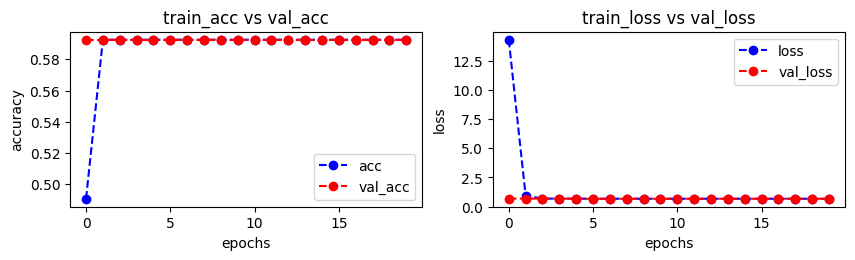

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(history)

In [ ]:
predictions = model.predict(X_test)

  # Convert the logits to probabilities
probabilities = tf.nn.softmax(predictions)

  # Get the class with the highest probability
predicted_classes = np.argmax(probabilities, axis=1)

  # Compare the predicted classes with the actual classes
comparison = list(zip(predicted_classes, y_test))

  # Display the first 10 predictions and actual values
for i in range(10):
    print(f'Predicted: {predicted_classes[i]}, Actual: {y_test[i]}')

2/2 [==============================] - 1s 1s/step
Predicted: 0, Actual: 0
Predicted: 0, Actual: 1
Predicted: 0, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
